In [168]:
import numpy as np
from lattice_class import *
from hamiltonian_constructor_class import *
import scipy.linalg
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 150
plt.rcParams["savefig.dpi"] = 150

# 1. Create Lattice

[70, 69, 68, 67, 66, 65, 64]
[7, 15, 23, 31, 39, 47, 55]
[3, 2, 0]
[0, 3, 2, 0]
[0, 3, 2, 0]
[0, 3, 2, 0]
[0, 3, 2, 0]
[0, 3, 2, 0]
[0, 3, 2, 0]


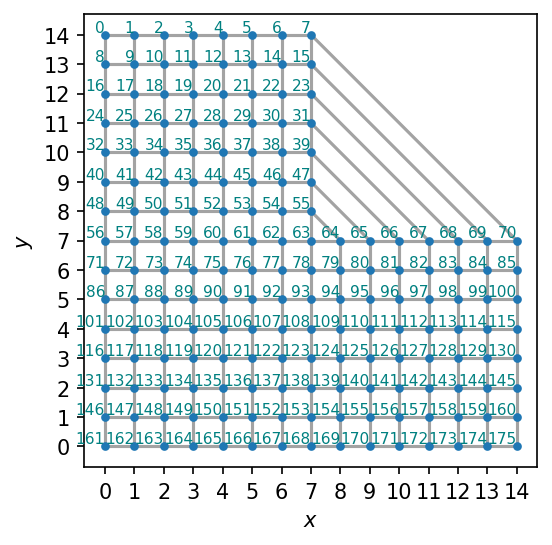

In [169]:
phase_geom = 1j
phase_vortex = -1
codim = 1

N = 15
lattice = SquareLattice(N, "open")

# lattice.add_bonds(
#     [(N // 2 + i * N - 2, N // 2 * N + N - 1 - i) for i in range(N // 2)],
#     [(2, 0) for i in range(N // 2)],
# )
lattice.remove_sites([(i * N + j) for i in range(N // 2) for j in range(N // 2 + N % 2, N)])
print([(N//2 + N%2) ** 2 + N//2 - (i + 1) for i in range(N//2)])
print([i * (N//2+N%2) + (N//2 + N%2) - 1 for i in range(N//2)])

flagged_bonds_geom = lattice.glue_bond([(N//2 + N%2) ** 2 + N//(1+N%2) - (i + 1) for i in range(N//2)], [i * (N//2+N%2) + (N//2 + N%2) - 1 for i in range(N//2)], (2, 0), codim=codim)

flagged_bonds_vortex = flagged_bonds_geom
# print("Flagged bonds for geometric phase = ", flagged_bonds_geom)
# print("Flagged bonds for vortex phase = ", flagged_bonds_vortex)


# ctr = 0
# for i in range(N // 2):
#     for j in range(N // 2+1, N):
#         lattice.remove_site(i * N + j - ctr)
#         ctr += 1

# flagged_edges = []
# for i in range(N // 2):
#     lattice.add_edge(
#         (i * (N // 2 + 1) + N // 2, (N // 2) * (N // 2 + 1) + N - (i + 1)), (2, 0)
#     )
#     # flagged_edges.append(((N // 2) * (N // 2 + 1) + N - (i + 1), (N // 2 + 2) * (N // 2 + 1) + N - (i + 2)))

# for i in range(N // 2 + 1):
#     flagged_edges.append(((N // 2 + 1)**2 + i * N - 1, (N // 2 + 1)**2 + i * N))

# change to t_y
# apply phase to orthogonal edge to cut

# flagged_edges = [
#     (i, i + 1) for i in range((N // 2 + 1) * (N // 2) + 1, (N // 2 + 2) * (N // 2))
# ]

# flagged_edges = [(19, 32), (14, 33), (9, 34), (4, 35)]

# flagged_edges = [(47, 36), (48, 37), (49, 38), (50, 39), (51, 40)]

# flagged_edges = [(23, 24), (18, 19), (13, 14), (8, 9), (3, 4)]
# flagged_edges = [(51, 52), (62, 63), (73, 74), (84, 85)]
# print(flagged_edges)


# flagged_bonds = [
#     (49, 56),
#     (50, 57),
#     (51, 58),
#     (52, 59),
#     (53, 60),
#     (54, 61),
#     (55, 62),
# ]

lattice_sites = lattice.get_sites()
lattice_bonds = lattice.get_bonds()
num_sites = lattice.get_num_sites()
lattice.plot(True)

local_bond_indices = lattice.get_local_bond_indices()

for bond in flagged_bonds_vortex:
    print(local_bond_indices[bond[1]])

[350 351 352 353]
Lowest found energy:  0.0004089891852185041
Index of lowest absolute energy:  352


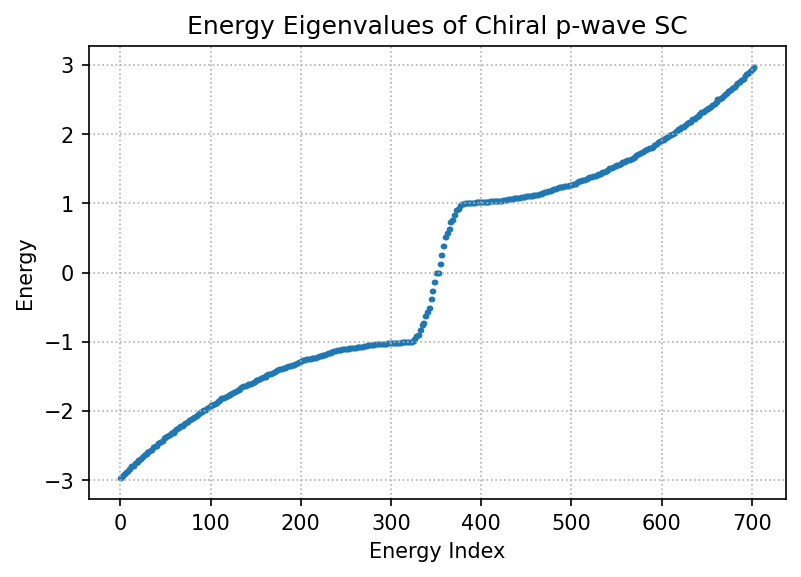

In [170]:
mu = 2
delta = complex(1.0, 0.0)
t = 1

Ham_constructor = HamiltonianConstructor(mu, t, t, delta)
H_direct_lattice = Ham_constructor.construct_direct_lattice_hamiltonian(lattice)
block_indices = Ham_constructor.get_block_indices(lattice.get_num_sites())

for flagged_bond in flagged_bonds_geom:
    Ham_constructor.add_phase(H_direct_lattice, flagged_bond, phase_geom, num_sites)

for flagged_bond in flagged_bonds_vortex:
    Ham_constructor.add_phase(H_direct_lattice, flagged_bond, phase_vortex, num_sites)

energies, states = scipy.linalg.eigh(H_direct_lattice)

tol = 0.05
low_energy_indices = np.argwhere(np.abs(energies) < tol)[:, 0]
print(low_energy_indices)

print("Lowest found energy: ", np.min(np.abs(energies)))
gs_idx = np.argmin(np.abs(energies))
print("Index of lowest absolute energy: ", gs_idx)

plt.xlabel("Energy Index")
plt.ylabel("Energy")
plt.grid(linestyle=":")
plt.title("Energy Eigenvalues of Chiral p-wave SC")
plt.scatter(range(len(energies)), energies, s=3)

Index = 352


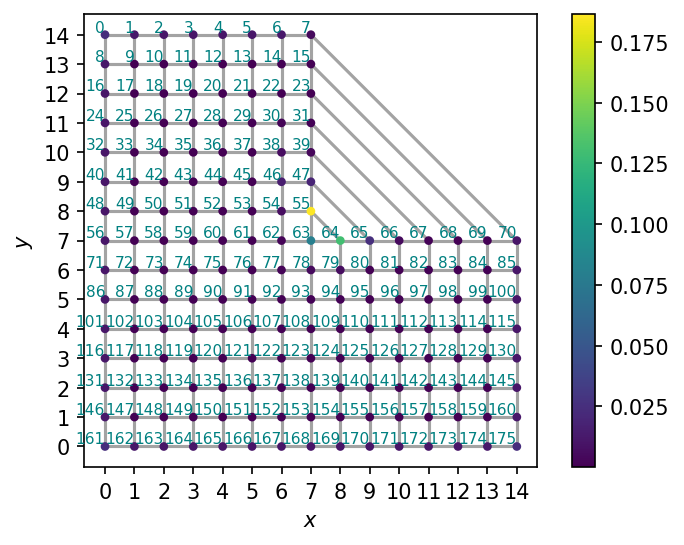

In [171]:
for gs_idx in range(gs_idx, gs_idx + 1):
    print("Index =", gs_idx)
    gs_wave_function = states[:, gs_idx]
    gs_probabilities_nambu = np.square(np.abs(gs_wave_function))
    gs_probabilities = np.zeros(shape=(num_sites, 1))

    for site_idx in range(num_sites):
        gs_probabilities[site_idx] = np.sum(
            gs_probabilities_nambu[block_indices[site_idx]]
        )

    x_values = [k[0] for k in lattice_sites]
    y_values = [k[1] for k in lattice_sites]

    color_map = plt.get_cmap("viridis")
    sc = lattice.plot(True, c=(gs_probabilities), cmap=color_map)
    plt.colorbar(sc)
    plt.show()

## Hop phase results

### Including edge nearest to disclination
n = 0: phase  = $e^{\frac{n\pi}{2}} = 1.0$ hase Lowest found energy:  0.04159891581792905

n = 1: phase = $e^{\frac{n\pi}{2}} = 1.0i$ has Lowest found energy:  0.040238925057125174

n = -1: phase = $e^{\frac{n\pi}{2}}= -1.0i$ has Lowest found energy:  0.04023892505712552

### Excluding edge nearest to disclination
n = 0: phase  = $e^{\frac{n\pi}{2}} = 1.0$ hase Lowest found energy:  0.04159891581792905

n = 1: phase = $e^{\frac{n\pi}{2}} = 1.0i$ has Lowest found energy:  0.040297000282122006

n = -1: phase = $e^{\frac{n\pi}{2}}= -1.0i$ has Lowest found energy:  0.040297000282122006

In [172]:
half_filling_energy = np.sum(energies[0 : 2 * num_sites])
print("Half filling energy =", half_filling_energy)

Half filling energy = -553.3540088689799


### Including edge nearest to disclination
$$n=+1: -140.92351803436424$$


$$n=-1: -140.92351803436426$$


$$n=0: -141.16633516847492$$


$$n=2: -140.51117786827353$$


### Exluding edge nearest to disclination
$$n=+1: -140.98592954483732$$


$$n=-1: -140.98592954483732$$


$$n=0: -141.16633516847492$$


$$n=2: -140.66173659874394$$

n = 1: -141.10091895484103

n = -1: -141.100918954841

n = 0: -141.16633516847492

n = 0: -141.16633516847492

n = 1: -141.0729788190133

n =-1: -141.07297881901326